In [96]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import importlib
import ast

import os
import sys

path_ = os.path.abspath(os.path.join('..', '00_utils'))
if path_ not in sys.path:
    sys.path.append(path_)
    
import analyse_results
reload_module = analyse_results.reload_module

Graphs = reload_module('analyse_results', 'Graphs')
Results = reload_module('analyse_results', 'Results')

In [139]:
fn = "results/results_network_size_5.pkl_2024-08-24_13-56-12_full.pkl"
with open(f'{fn}', 'rb') as file:
    jax_net_size = pickle.load(file)
    
fn = "results/results_network_size_5.pkl_2024-08-24_15-02-46_full.pkl"
with open(f'{fn}', 'rb') as file:
    jax_net_size_128 = pickle.load(file)

fn_timings = 'results/network_timings_2024-08-24_15-34-36_full.pkl'
with open(f'{fn_timings}', 'rb') as file:
    timings = pickle.load(file)

jax_net_size.update(jax_net_size_128)

In [140]:
timings;

In [120]:
def custom_sort_key(lst):
    return (len(lst), lst)

In [151]:
Results.key_sample(jax_net_size, 200)
df = Results.parse_results(jax_net_size, ['ls', 'regularization', 'epochs'])
df_bx = Results.prep_for_boxplots(df, ['ls'], ['mse_diffrax', 'mse_diffrax_test'])

df_bx['sort_key'] = df_bx['x_labels'].apply(custom_sort_key)
df_bx = df_bx.sort_values(by='sort_key')
df_bx.drop(columns='sort_key', inplace=True)
df_bx

,mse_diffrax,mse_diffrax_test,x_labels
2,"[0.07620478275677495, 0.09278675140985426, 0.1...","[0.5376941220996303, 0.2476474088598866, 0.395...","[6, 16, 1]"
3,"[0.014170084471637973, 0.026092865441633615, 0...","[0.26674506393814534, 0.10491367753006223, 0.2...","[6, 32, 1]"
5,"[0.007728837776768791, 0.014807100001473143, 0...","[0.2109382651025699, 0.0824444037401971, 0.271...","[6, 64, 1]"
0,"[0.004136865251746844, 0.01223400609695736, 0....","[0.11767859375523866, 0.06974568928288458, 0.0...","[6, 128, 1]"
1,"[0.2736071454018502, 0.13643812462371527, 0.23...","[0.9461452787804859, 0.3402833991882759, 0.536...","[6, 16, 16, 1]"
4,"[0.09768878334343657, 0.07237938262018219, 0.0...","[0.555175193894065, 0.23193189645114903, 0.123...","[6, 32, 32, 1]"


In [152]:
# best performing models
display(df.sort_values('mse_diffrax').head(5))
display(df.sort_values('mse_diffrax_test').head(5))

,ls,regularization,epochs,date,times_elapsed,mse_diffrax,mse_diffrax_test
239,"[6, 128, 1]",0.000000e+00,10000,2015-01-05,35.125217,0.002262,0.054359
235,"[6, 128, 1]",0.000000e+00,10000,2015-01-01,36.687374,0.002511,0.110123
251,"[6, 128, 1]",1.000000e-07,10000,2015-01-02,35.711555,0.002531,0.036700
254,"[6, 128, 1]",1.000000e-07,10000,2015-01-05,33.802939,0.002695,0.031514
250,"[6, 128, 1]",1.000000e-07,10000,2015-01-01,34.155462,0.002886,0.111943


,ls,regularization,epochs,date,times_elapsed,mse_diffrax,mse_diffrax_test
252,"[6, 128, 1]",1.000000e-07,10000,2015-01-03,3.305316e+01,0.003876,0.011207
237,"[6, 128, 1]",0.000000e+00,10000,2015-01-03,3.504817e+01,0.003448,0.011816
103,"[6, 64, 1]",0.000000e+00,10000,2015-01-04,1.724501e+09,0.003325,0.012213
267,"[6, 128, 1]",1.000000e-05,10000,2015-01-03,3.235764e+01,0.004353,0.012728
236,"[6, 128, 1]",0.000000e+00,10000,2015-01-02,3.552658e+01,0.003483,0.013544


In [154]:
df_timings = Results.parse_results(timings, ['ls', 'regularization', 'epochs'])
df_bx_timinings = Results.prep_for_boxplots(df, ['ls'], ['times_elapsed'])
df_bx_timinings

,times_elapsed,x_labels
0,"[19.028720140457153, 17.86548900604248, 17.819...","[6, 128, 1]"
1,"[1724501835.0154529, 1724501848.7099671, 17245...","[6, 16, 16, 1]"
2,"[1724499335.819255, 1724499347.348005, 1724499...","[6, 16, 1]"
3,"[1724500047.098271, 1724500060.109515, 1724500...","[6, 32, 1]"
4,"[1724502802.952728, 1724502821.63947, 17245028...","[6, 32, 32, 1]"
5,"[1724500847.531358, 1724500862.877084, 1724500...","[6, 64, 1]"


In [155]:
# concatenate the two dataframes on the x_labels
df_bx = df_bx.merge(df_bx_timinings, on='x_labels')
df_bx

,mse_diffrax,mse_diffrax_test,x_labels,times_elapsed
0,"[0.07620478275677495, 0.09278675140985426, 0.1...","[0.5376941220996303, 0.2476474088598866, 0.395...","[6, 16, 1]","[1724499335.819255, 1724499347.348005, 1724499..."
1,"[0.014170084471637973, 0.026092865441633615, 0...","[0.26674506393814534, 0.10491367753006223, 0.2...","[6, 32, 1]","[1724500047.098271, 1724500060.109515, 1724500..."
2,"[0.007728837776768791, 0.014807100001473143, 0...","[0.2109382651025699, 0.0824444037401971, 0.271...","[6, 64, 1]","[1724500847.531358, 1724500862.877084, 1724500..."
3,"[0.004136865251746844, 0.01223400609695736, 0....","[0.11767859375523866, 0.06974568928288458, 0.0...","[6, 128, 1]","[19.028720140457153, 17.86548900604248, 17.819..."
4,"[0.2736071454018502, 0.13643812462371527, 0.23...","[0.9461452787804859, 0.3402833991882759, 0.536...","[6, 16, 16, 1]","[1724501835.0154529, 1724501848.7099671, 17245..."
5,"[0.09768878334343657, 0.07237938262018219, 0.0...","[0.555175193894065, 0.23193189645114903, 0.123...","[6, 32, 32, 1]","[1724502802.952728, 1724502821.63947, 17245028..."


In [122]:
help(Graphs.plot_boxplots)

Help on function plot_boxplots in module analyse_results:

plot_boxplots(data1, data2, labels, title, ylabel, colors=('blue', 'green'), color_labels=['Pyomo', 'Diffrax'], x_label='Model Size Configuration')



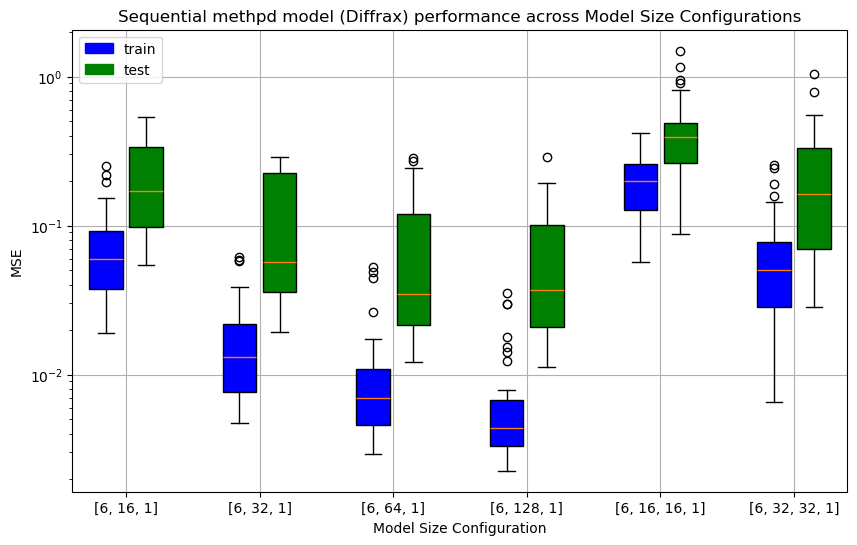

In [135]:
Graphs.plot_boxplots(df_bx.mse_diffrax, df_bx.mse_diffrax_test, df_bx.x_labels, 'Sequential methpd model (Diffrax) performance across Model Size Configurations', 'MSE', color_labels=['train', 'test'])

In [130]:
# save to pickle
path = 'interim_results/diffrax_net_size.pkl'
with open(path, 'wb') as file:
    pickle.dump(df_bx, file)
print(f"Results saved to {path}")

Results saved to interim_results/diffrax_net_size.pkl
